<a href="https://colab.research.google.com/github/aetev/Learning-stuff-/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install git+https://github.com/pvigier/perlin-numpy

  Cloning https://github.com/pvigier/perlin-numpy to /tmp/pip-req-build-bt9jyqmi
  Running command git clone --filter=blob:none --quiet https://github.com/pvigier/perlin-numpy /tmp/pip-req-build-bt9jyqmi
  Resolved https://github.com/pvigier/perlin-numpy to commit 5e26837db14042e51166eb6cad4c0df2c1907016
  Preparing metadata (setup.py) ... done
  Created wheel for perlin-numpy: filename=perlin_numpy-0.0.0-py3-none-any.whl size=4723 sha256=a3836bc2acd667d1b19963df55bcc38c92372ddb26437f9791c7ddc5d67aebea
  Stored in directory: /tmp/pip-ephem-wheel-cache-y2l5m_3u/wheels/d0/67/1b/569e9d602b147a53e4ab67a3592944572d7d3886dc3a2e095e
Successfully built perlin-numpy


In [4]:
pip install noise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for noise: filename=noise-1.2.2-cp310-cp310-linux_x86_64.whl size=56262 sha256=209facdaa42a9ae07ce95aab5f0d37ef79eb4bc7ebfec2cdbbc7840935cd6d43
  Stored in directory: /root/.cache/pip/wheels/b2/01/64/ca2f6ed556c204d5ce2d3719a58757a5504aeb5525654692d0
Successfully built noise


In [36]:
pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 5.5 MB/s eta 0:00:00


In [37]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
import numpy as np
from perlin_numpy import generate_perlin_noise_2d
import noise
from noise import pnoise2
from noise import snoise3
import tensorflow_addons as tfa
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, GlobalAveragePooling2D, Dense

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


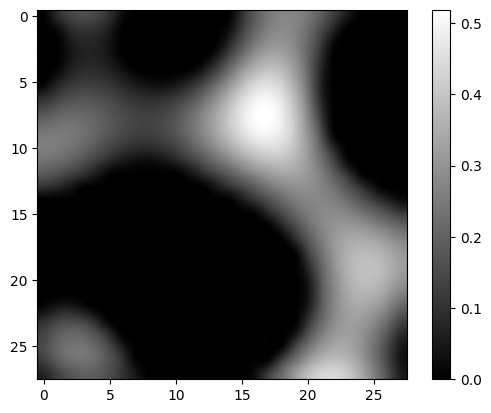

In [7]:
#np.random.seed(1)
noise = generate_perlin_noise_2d((28, 28), (2, 2))
noise = np.clip(noise,0,1)
plt.imshow(noise, cmap='gray', interpolation='lanczos')
plt.colorbar()

In [8]:


# Load MNIST dataset
(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Normalize the images to [-1, 1]
#x_train = (x_train.astype("float32") - 127.5) / 127.5
#y_train = y_train.reshape(-1, 1)
x_train = (x_train.astype("float32")) / np.max(x_train)


# Example usage
image_index = 0  # Index of the image you want to retrieve
image = x_train[image_index]
print(image.shape)
print(x_train.shape[0])


11490434/11490434 [==============================] - 0s 0us/step
(28, 28)
60000


In [9]:
print(np.max(x_train))

1.0


In [10]:
x_train2 = x_train[:100]
y_train2 = y_train[:100]

In [13]:
class AddNoiseLayer(tf.keras.layers.Layer):
    def __init__(self, stddev, probability, **kwargs):
        super(AddNoiseLayer, self).__init__(**kwargs)
        self.stddev = stddev
        self.probability = probability

    def call(self, inputs, training=None):
        if training:

            if tf.random.uniform(()) < self.probability:
                perlin = generate_perlin_noise_2d((28, 28), (2, 2))
                perlin = tf.convert_to_tensor(perlin, dtype=tf.float32)
                perlin = tf.clip_by_value(perlin, 0, 1)
                perlin = tf.reshape(perlin, (28, 28, 1))
                noise = tf.random.normal(shape=tf.shape(inputs), mean=0.0, stddev=self.stddev, dtype=tf.float32)
                output = inputs + noise * perlin
                return tf.clip_by_value(output, 0, 1)
            else:
                return inputs
        return inputs

In [29]:
class AddNoiseLayertest(tf.keras.layers.Layer):
    def __init__(self, stddev=.5, **kwargs):
        super(AddNoiseLayertest, self).__init__(**kwargs)
        self.stddev = stddev

    def call(self, inputs, training=None):
        if training:

              perlin = generate_perlin_noise_2d((28, 28), (2, 2))
              perlin = tf.convert_to_tensor(perlin, dtype=tf.float32)
              perlin = tf.clip_by_value(perlin, 0, 1)
              perlin = tf.reshape(perlin, (28, 28, 1))
              noise = tf.random.normal(shape=tf.shape(inputs), mean=0.0, stddev=self.stddev, dtype=tf.float32)
              output = inputs + noise * perlin
              return tf.clip_by_value(output, 0, 1)
        return inputs

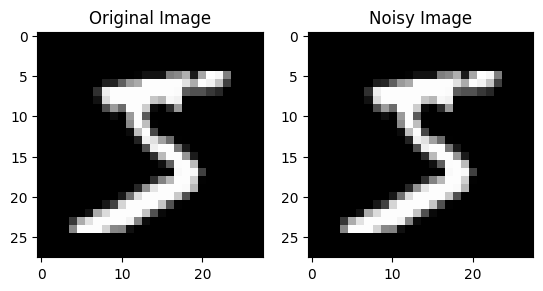

(28, 28, 1)


In [14]:
# Create a random 28x28 image tensor
image = x_train[0]
image = np.expand_dims(image,-1)
# Instantiate the RandomNoiseLayer
GaussianPerlinNoiseLayer = AddNoiseLayer(.5,.5)

# Pass the image through the layer
noisy_image = GaussianPerlinNoiseLayer(image,training=True)

# Display the original and noisy images
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
plt.imshow(np.squeeze(image), cmap='gray')  # Display the original image
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(np.squeeze(noisy_image), cmap='gray')  # Display the noisy image
plt.title('Noisy Image')
plt.show()

print(noisy_image.shape)

In [15]:
class ResidualBlock(tf.keras.layers.Layer):
    def __init__(self, filters, strides=1, activation='relu', **kwargs):
        super(ResidualBlock, self).__init__(**kwargs)
        self.filters = filters
        self.strides = strides
        self.activation = tf.keras.activations.get(activation)

        self.conv1 = tf.keras.layers.Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.conv2 = tf.keras.layers.Conv2D(filters, kernel_size=(3, 3), strides=1, padding='same')
        self.bn2 = tf.keras.layers.BatchNormalization()
        self.shortcut = tf.keras.layers.Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='same')
        self.shortcut_bn = tf.keras.layers.BatchNormalization()

    def call(self, inputs, training=False):
        x = self.conv1(inputs)
        x = self.bn1(x, training=training)
        x = self.activation(x)
        x = self.conv2(x)
        x = self.bn2(x, training=training)

        shortcut = self.shortcut(inputs)
        shortcut = self.shortcut_bn(shortcut, training=training)

        x = tf.keras.layers.add([x, shortcut])
        x = self.activation(x)

        return x

In [27]:
class CustomFullAug(tf.keras.layers.Layer):
    def __init__(self, probability=.2,rot_factor=.2,height=.2,width=.2,stdev=.2):
        super(CustomFullAug, self).__init__()
        self.probability = probability

        self.rot_factor = rot_factor
        self.height = height
        self.width = width
        self.stdev = stdev
        self.flip_layer = tf.keras.layers.RandomFlip()
        self.zoom_layer = tf.keras.layers.RandomZoom(height_factor=height,width_factor=width)
        self.rotation_layer = tf.keras.layers.RandomRotation(factor=rot_factor)
        self.noise_layer = AddNoiseLayertest()

    def call(self, inputs=.2, training=True):
        if tf.random.uniform(()) < self.probability:
            #flipped_data = self.flip_layer(inputs, training=training)
            rotated_data = self.rotation_layer(inputs, training=training)
            zoomed_data = self.zoom_layer(rotated_data, training=training)
            noised = self.noise_layer(zoomed_data, training=training)
            return noised
        else:
            return inputs

In [17]:

class CustomFlipLayer(tf.keras.layers.Layer):
    def __init__(self, probability):
        super(CustomFlipLayer, self).__init__()
        self.probability = probability
        self.flip_layer = tf.keras.layers.RandomFlip()

    def call(self, inputs=.2, training=True):
        if tf.random.uniform(()) < self.probability:
            flipped_data = self.flip_layer(inputs, training=training)
            return flipped_data
        else:
            return inputs

In [18]:
class CustomRotationLayer(tf.keras.layers.Layer):
    def __init__(self, probability, factor):
        super(CustomRotationLayer, self).__init__()
        self.probability = probability
        self.factor = factor
        self.rotation_layer = tf.keras.layers.RandomRotation(factor=factor)

    def call(self, inputs, training=True):
        if tf.random.uniform(()) < self.probability:
            rotated_data = self.rotation_layer(inputs, training=training)
            return rotated_data
        else:
            return inputs

In [19]:
class CustomZoomLayer(tf.keras.layers.Layer):
    def __init__(self, probability,height, width):
        super(CustomZoomLayer, self).__init__()
        self.probability = probability
        self.height = height
        self.width = width
        self.zoom_layer = tf.keras.layers.RandomZoom(height_factor=height,width_factor=width)

    def call(self, inputs, training=False):
        if tf.random.uniform(()) < self.probability:
            zoomed_data = self.zoom_layer(inputs, training=training)
            return zoomed_data
        else:
            return inputs

In [20]:


def build_generator():
    noise_shape = (28,28,1)
    noise = layers.Input(shape=noise_shape)
    input_digit = layers.Input(shape=(1,), dtype="int32")
    digit_embedding = layers.Embedding(10, 28*28)(input_digit)
    digit_embedding = layers.Reshape((28, 28, 1))(digit_embedding)


    x = layers.Concatenate()([noise, digit_embedding])


    x = layers.Conv2D(256, kernel_size=5, strides=1, padding='same', activation='relu')(x)
    x = layers.Conv2D(256, kernel_size=3, strides=2, padding='same', activation='relu')(x)
    x = layers.Conv2D(256, kernel_size=2, strides=2, padding='same', activation='relu')(x)
    x = layers.Conv2DTranspose(64, 2, strides=2, padding="same", activation="relu")(x)
    x = layers.Conv2DTranspose(1, 2, strides=2, padding="same", activation="tanh")(x)


    model = tf.keras.models.Model(inputs=[noise, input_digit], outputs=x)
    return model

generator = build_generator()
generator.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 784)       7840        ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 reshape (Reshape)              (None, 28, 28, 1)    0           ['embedding[0][0]']              
                                                                                              

In [30]:

def build_discriminator():
    input_image = layers.Input(shape=(28, 28, 1))
    digit_input = layers.Input(shape=(1,), dtype="int32")
    digit_embedding_2d = layers.Embedding(10, 28*28)(digit_input)
    digit_embedding_2d = layers.Reshape((28, 28, 1))(digit_embedding_2d)

    #noise = AddNoiseLayer(stddev=0.2,probability=.1)(input_image)  # Pass the input image through the PerlinNoiseLayer
    aug = CustomFullAug()(input_image)
    merged_input = layers.Concatenate()([aug, digit_embedding_2d])

    x = layers.Conv2D(64,4,strides=(1,1),padding='same',activation='gelu')(merged_input)
    x = layers.Dropout(.2)(x)
    x = layers.Conv2D(64,4,strides=(2,2),padding='same',activation='gelu')(x)
    x = layers.Dropout(.2)(x)
    x = layers.Conv2D(64,3,strides=(2,2),padding='same',activation='gelu')(x)
    x = layers.Dropout(.2)(x)
    x = layers.Conv2D(64,2,strides=(2,2),padding='same',activation='tanh')(x)
    x = layers.Dropout(.2)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(1, activation="sigmoid")(x)

    model = tf.keras.models.Model(inputs=[input_image, digit_input], outputs=x)
    return model

discriminator = build_discriminator()
discriminator.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_9 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 1, 784)       7840        ['input_10[0][0]']               
                                                                                                  
 custom_full_aug_1 (CustomFullA  (None, 28, 28, 1)   0           ['input_9[0][0]']                
 ug)                                                                                        

In [31]:
# Define the GAN model
def build_gan(generator, discriminator):
    noise_shape = (28,28,1)
    digit_shape = (1,)
    noise = layers.Input(shape=noise_shape)
    digit = layers.Input(shape=digit_shape)

    generated_image = generator([noise, digit])

    discriminator_output = discriminator([generated_image, digit])
    model = tf.keras.models.Model(inputs=[noise, digit], outputs=discriminator_output)
    return model

gan = build_gan(generator, discriminator)
gan.summary()




Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 input_12 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 model (Functional)             (None, 28, 28, 1)    939233      ['input_11[0][0]',               
                                                                  'input_12[0][0]']               
                                                                                                  
 model_3 (Functional)           (None, 1)            129953      ['model[1][0]',            

In [32]:
# Compile models
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [33]:
def discriminator_loss(real_output, fake_output):
    real_loss = tf.keras.losses.BinaryCrossentropy()(tf.ones_like(real_output), real_output)
    fake_loss = tf.keras.losses.BinaryCrossentropy()(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return tf.keras.losses.BinaryCrossentropy()(tf.ones_like(fake_output), fake_output)



Epoch 5/20000
1/1 [==============================] - 0s 85ms/step


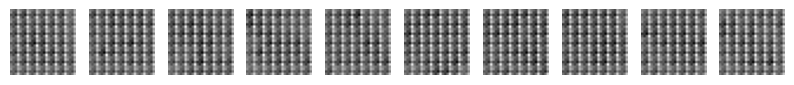

Epoch 10/20000
1/1 [==============================] - 0s 80ms/step


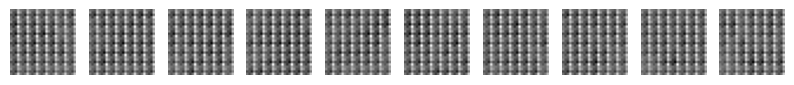

Epoch 15/20000
1/1 [==============================] - 0s 84ms/step


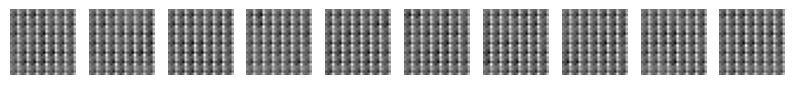

Epoch 20/20000
1/1 [==============================] - 0s 76ms/step


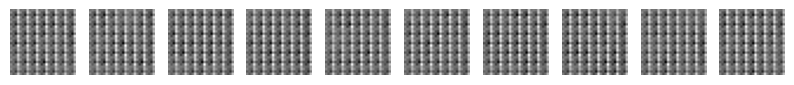

Epoch 25/20000
1/1 [==============================] - 0s 87ms/step


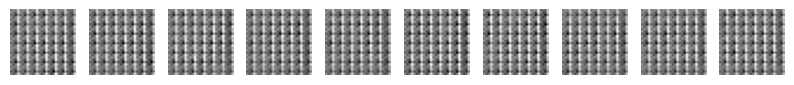

Epoch 30/20000
1/1 [==============================] - 0s 84ms/step


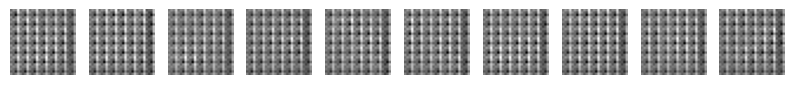

Epoch 35/20000
1/1 [==============================] - 0s 76ms/step


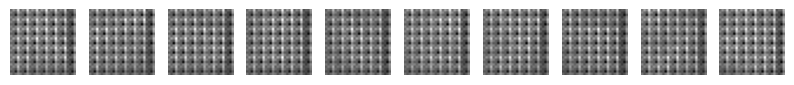

Epoch 40/20000
1/1 [==============================] - 0s 77ms/step


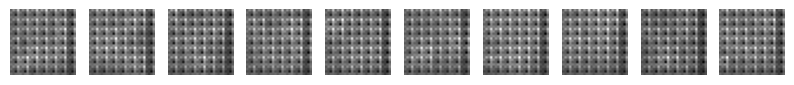

Epoch 45/20000
1/1 [==============================] - 0s 73ms/step


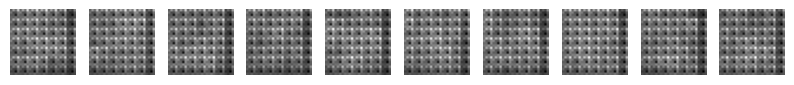

Epoch 50/20000
1/1 [==============================] - 0s 82ms/step


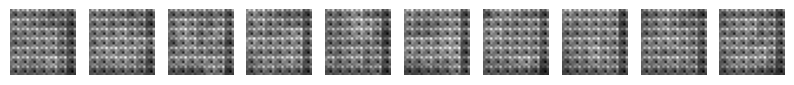

Epoch 55/20000
1/1 [==============================] - 0s 79ms/step


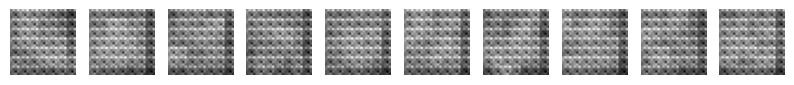

Epoch 60/20000
1/1 [==============================] - 0s 80ms/step


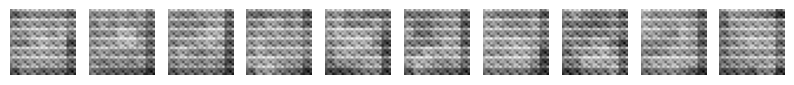

Epoch 65/20000
1/1 [==============================] - 0s 78ms/step


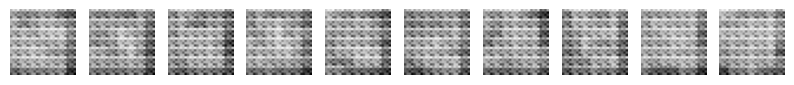

Epoch 70/20000
1/1 [==============================] - 0s 77ms/step


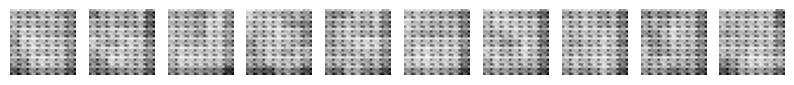

KeyboardInterrupt: ignored

In [34]:


@tf.function
def train_step(images, labels):
    batch_size = images.shape[0]
    noise = tf.random.normal([batch_size, 28,28,1])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator([noise, labels], training=True)

        real_output = discriminator([images, labels], training=True)
        fake_output = discriminator([generated_images, labels], training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

# Training loop
def train(generator, discriminator, gan, epochs, batch_size):
    for epoch in range(epochs):
        for batch in range(len(x_train2) // batch_size):
            images = x_train2[batch * batch_size: (batch+1) * batch_size]
            labels = y_train2[batch * batch_size: (batch+1) * batch_size]

            train_step(images, labels)

        # Output training progress
        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch+1}/{epochs}")
            # Generate and save sample images
            noise = tf.random.normal([10, 28,28,1])
            sampled_labels = tf.constant([[i % 10] for i in range(10)], dtype=tf.int32)
            generated_images = generator.predict([noise, sampled_labels])
            generated_images = generated_images#(generated_images * 0.5) + 0.5  # Rescale images from [-1, 1] to [0, 1]
            fig, axs = plt.subplots(1, 10, figsize=(10, 10))
            for i in range(10):
                axs[i].imshow(generated_images[i], cmap="gray")
                axs[i].axis("off")
            plt.show()

# Train the GAN
EPOCHS = 20000
BATCH_SIZE = 64
train(generator, discriminator, gan, EPOCHS, BATCH_SIZE)

In [87]:
def compute_ssim(images):
    combined_ssim = 0.0
    num_pairs = 0

    for i in range(len(images)):
        for j in range(i+1, len(images)):
            ssim = tf.image.ssim(images[i], images[j], max_val=1.0)
            combined_ssim += ssim
            num_pairs += 1

    if num_pairs > 0:
        combined_ssim /= num_pairs

    return combined_ssim

In [90]:
@tf.function
def train_step(images, labels):
    batch_size = images.shape[0]
    noise = tf.random.normal([batch_size, 28, 28, 1])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator([noise, labels], training=True)

        real_output = discriminator([images, labels], training=True)
        fake_output = discriminator([generated_images, labels], training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        # Calculate the similarity loss
        similarity_loss_value = compute_ssim(generated_images[:5])
        # Additional loss term
        gen_loss += similarity_loss_value

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    tf.print("Similarity Loss:", similarity_loss_value, end=' ')
    tf.print("Generator Loss:", gen_loss, end=' ')
    tf.print("Discriminator Loss:", disc_loss)
def train(generator, discriminator, gan, epochs, batch_size):
    for epoch in range(epochs):
        for batch in range(len(x_train2) // batch_size):
            images = x_train2[batch * batch_size: (batch + 1) * batch_size]
            labels = y_train2[batch * batch_size: (batch + 1) * batch_size]

            train_step(images, labels)

        # Output training progress
        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch + 1}/{epochs}")
            # Generate and save sample images
            noise = tf.random.normal([10, 28, 28, 1])
            sampled_labels = tf.constant([[i % 10] for i in range(10)], dtype=tf.int32)
            generated_images = generator.predict([noise, sampled_labels])
            generated_images = generated_images  # (generated_images * 0.5) + 0.5  # Rescale images from [-1, 1] to [0, 1]
            fig, axs = plt.subplots(1, 10, figsize=(10, 10))
            for i in range(10):
                axs[i].imshow(generated_images[i], cmap="gray")
                axs[i].axis("off")
            plt.show()

Similarity Loss: 0.240560412 Generator Loss: 2.22032928 Discriminator Loss: 0.76386863
Similarity Loss: 0.0752118602 Generator Loss: 1.90672481 Discriminator Loss: 0.416367471
Similarity Loss: 0.0614802651 Generator Loss: 1.38136959 Discriminator Loss: 0.531807959
Similarity Loss: 0.0475512147 Generator Loss: 1.78147745 Discriminator Loss: 0.411446154
Similarity Loss: 0.166252077 Generator Loss: 1.95867491 Discriminator Loss: 0.615128517
Epoch 5/20000
1/1 [==============================] - 0s 79ms/step


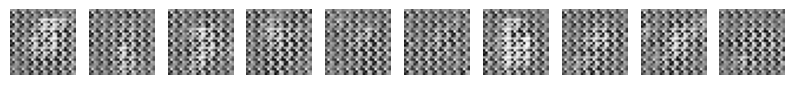

Similarity Loss: 0.194493368 Generator Loss: 1.94713485 Discriminator Loss: 0.386843532
Similarity Loss: 0.179061636 Generator Loss: 1.88681352 Discriminator Loss: 0.397498459
Similarity Loss: 0.165613249 Generator Loss: 1.81140435 Discriminator Loss: 0.713558435
Similarity Loss: 0.200251773 Generator Loss: 1.92957199 Discriminator Loss: 0.375009686
Similarity Loss: 0.205222875 Generator Loss: 1.88187981 Discriminator Loss: 0.395621896
Epoch 10/20000
1/1 [==============================] - 0s 80ms/step


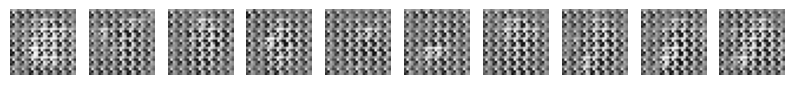

Similarity Loss: 0.139753461 Generator Loss: 1.61968315 Discriminator Loss: 0.427588105
Similarity Loss: 0.213252544 Generator Loss: 1.83773303 Discriminator Loss: 0.383597851
Similarity Loss: 0.125948876 Generator Loss: 1.73992395 Discriminator Loss: 0.392505914
Similarity Loss: 0.176362678 Generator Loss: 1.94443333 Discriminator Loss: 0.350193918
Similarity Loss: 0.176268414 Generator Loss: 1.87641895 Discriminator Loss: 0.352579206
Epoch 15/20000
1/1 [==============================] - 0s 129ms/step


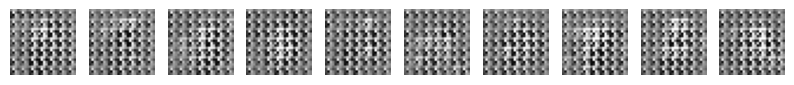

Similarity Loss: 0.067252323 Generator Loss: 1.90777099 Discriminator Loss: 0.333096623
Similarity Loss: 0.110802285 Generator Loss: 1.81658173 Discriminator Loss: 0.350794077
Similarity Loss: 0.0972475 Generator Loss: 1.97138882 Discriminator Loss: 0.474800348
Similarity Loss: 0.118054569 Generator Loss: 2.07692742 Discriminator Loss: 0.284795463
Similarity Loss: 0.0953544676 Generator Loss: 2.07527 Discriminator Loss: 0.291459292
Epoch 20/20000
1/1 [==============================] - 0s 168ms/step


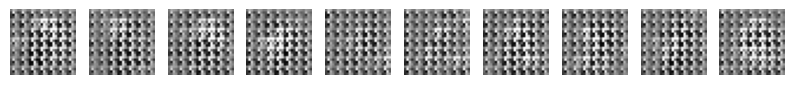

Similarity Loss: 0.107992783 Generator Loss: 2.06212449 Discriminator Loss: 0.308031142
Similarity Loss: 0.19518885 Generator Loss: 1.99181569 Discriminator Loss: 0.319227874
Similarity Loss: 0.115739465 Generator Loss: 1.96288478 Discriminator Loss: 0.489294112
Similarity Loss: 0.147043 Generator Loss: 2.11173773 Discriminator Loss: 0.460698873
Similarity Loss: 0.213724926 Generator Loss: 2.37603593 Discriminator Loss: 0.458622664
Epoch 25/20000
1/1 [==============================] - 0s 147ms/step


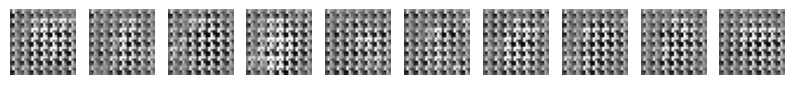

Similarity Loss: 0.149771094 Generator Loss: 2.1471324 Discriminator Loss: 0.277060479
Similarity Loss: 0.181172535 Generator Loss: 2.18463755 Discriminator Loss: 0.28906244
Similarity Loss: 0.25126487 Generator Loss: 2.19859552 Discriminator Loss: 0.272735685
Similarity Loss: 0.173387751 Generator Loss: 2.1537466 Discriminator Loss: 0.277040064
Similarity Loss: 0.080452539 Generator Loss: 2.05911136 Discriminator Loss: 0.452866
Epoch 30/20000
1/1 [==============================] - 0s 156ms/step


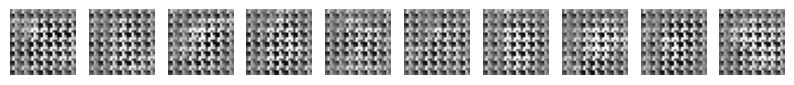

Similarity Loss: 0.299960226 Generator Loss: 2.24748635 Discriminator Loss: 0.284930825
Similarity Loss: 0.370901078 Generator Loss: 2.33051419 Discriminator Loss: 0.269207358
Similarity Loss: 0.148654252 Generator Loss: 2.05184579 Discriminator Loss: 0.274783254
Similarity Loss: 0.276702076 Generator Loss: 2.14426947 Discriminator Loss: 0.30447945
Similarity Loss: 0.370943844 Generator Loss: 2.13565254 Discriminator Loss: 0.302397132
Epoch 35/20000
1/1 [==============================] - 0s 147ms/step


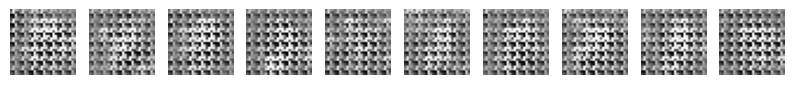

Similarity Loss: 0.443386167 Generator Loss: 2.24524331 Discriminator Loss: 0.32668525
Similarity Loss: 0.321687907 Generator Loss: 2.06800318 Discriminator Loss: 0.342568338
Similarity Loss: 0.271683812 Generator Loss: 2.09209108 Discriminator Loss: 0.310145855
Similarity Loss: 0.382122219 Generator Loss: 1.87135124 Discriminator Loss: 0.470635265
Similarity Loss: 0.548819363 Generator Loss: 2.06236434 Discriminator Loss: 0.46478489
Epoch 40/20000
1/1 [==============================] - 0s 149ms/step


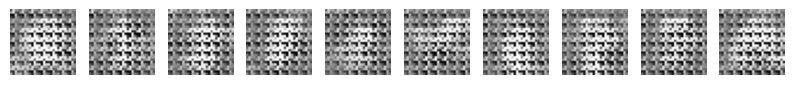

Similarity Loss: 0.592396379 Generator Loss: 2.15942 Discriminator Loss: 0.561539888
Similarity Loss: 0.529354274 Generator Loss: 2.24638605 Discriminator Loss: 0.36740005
Similarity Loss: 0.568317175 Generator Loss: 2.38689232 Discriminator Loss: 0.35340488
Similarity Loss: 0.596383274 Generator Loss: 1.99357724 Discriminator Loss: 0.545153379
Similarity Loss: 0.588198483 Generator Loss: 2.13438272 Discriminator Loss: 0.42394
Epoch 45/20000
1/1 [==============================] - 0s 156ms/step


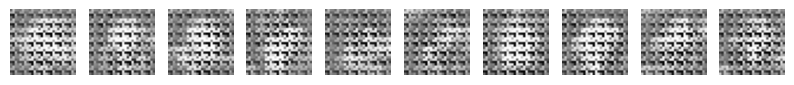

Similarity Loss: 0.414945185 Generator Loss: 2.43904734 Discriminator Loss: 0.322156787
Similarity Loss: 0.429743588 Generator Loss: 1.70707178 Discriminator Loss: 0.85076052
Similarity Loss: 0.572126508 Generator Loss: 2.53122973 Discriminator Loss: 0.354188502
Similarity Loss: 0.398081452 Generator Loss: 2.25163054 Discriminator Loss: 0.389782846
Similarity Loss: 0.522967041 Generator Loss: 1.69574142 Discriminator Loss: 0.721848965
Epoch 50/20000
1/1 [==============================] - 0s 154ms/step


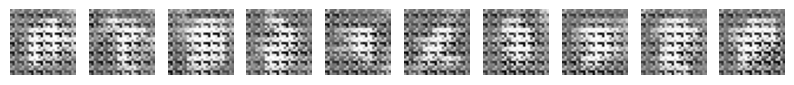

Similarity Loss: 0.442739099 Generator Loss: 1.80717468 Discriminator Loss: 0.551406741
Similarity Loss: 0.551003397 Generator Loss: 1.56238031 Discriminator Loss: 1.20710063
Similarity Loss: 0.49123764 Generator Loss: 1.34800291 Discriminator Loss: 1.04637909
Similarity Loss: 0.571668386 Generator Loss: 1.16174722 Discriminator Loss: 1.69822454
Similarity Loss: 0.407587737 Generator Loss: 0.850780964 Discriminator Loss: 1.85943902
Epoch 55/20000
1/1 [==============================] - 0s 75ms/step


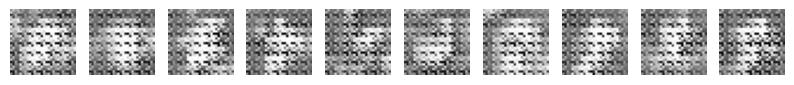

Similarity Loss: 0.497421831 Generator Loss: 0.937452316 Discriminator Loss: 2.06253386
Similarity Loss: 0.539356947 Generator Loss: 0.903585434 Discriminator Loss: 2.16792798
Similarity Loss: 0.565330625 Generator Loss: 0.904321194 Discriminator Loss: 2.03844762
Similarity Loss: 0.586495817 Generator Loss: 1.51097846 Discriminator Loss: 1.10341656
Similarity Loss: 0.526529789 Generator Loss: 0.95959878 Discriminator Loss: 1.94091904
Epoch 60/20000
1/1 [==============================] - 0s 80ms/step


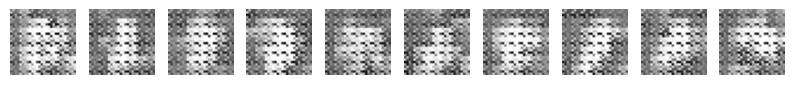

Similarity Loss: 0.506025672 Generator Loss: 1.11715925 Discriminator Loss: 1.87999535
Similarity Loss: 0.652970552 Generator Loss: 1.4879024 Discriminator Loss: 1.17119455
Similarity Loss: 0.459638208 Generator Loss: 1.44265878 Discriminator Loss: 1.08479047
Similarity Loss: 0.641135633 Generator Loss: 1.99536991 Discriminator Loss: 1.57273936
Similarity Loss: 0.495722204 Generator Loss: 2.14465976 Discriminator Loss: 0.900047243
Epoch 65/20000
1/1 [==============================] - 0s 82ms/step


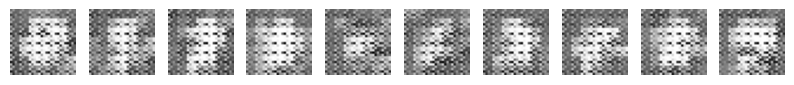

Similarity Loss: 0.530852139 Generator Loss: 2.31538343 Discriminator Loss: 0.809933662
Similarity Loss: 0.495304197 Generator Loss: 2.53068924 Discriminator Loss: 0.814945817
Similarity Loss: 0.41561389 Generator Loss: 2.50370431 Discriminator Loss: 0.829550385
Similarity Loss: 0.487030715 Generator Loss: 2.65467858 Discriminator Loss: 0.83333
Similarity Loss: 0.492770433 Generator Loss: 2.53881955 Discriminator Loss: 0.859361887
Epoch 70/20000
1/1 [==============================] - 0s 81ms/step


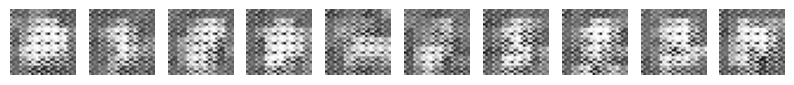

Similarity Loss: 0.550940454 Generator Loss: 2.61925793 Discriminator Loss: 0.794169426
Similarity Loss: 0.433613271 Generator Loss: 2.35861015 Discriminator Loss: 0.849944
Similarity Loss: 0.245646313 Generator Loss: 1.90540528 Discriminator Loss: 0.85476315
Similarity Loss: 0.386863977 Generator Loss: 1.87888789 Discriminator Loss: 0.898363233
Similarity Loss: 0.397872716 Generator Loss: 1.67295909 Discriminator Loss: 0.984085917
Epoch 75/20000
1/1 [==============================] - 0s 79ms/step


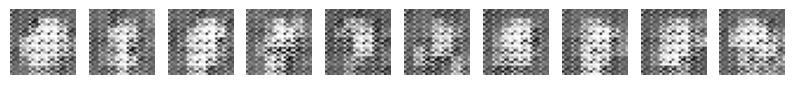

Similarity Loss: 0.408951849 Generator Loss: 1.53304398 Discriminator Loss: 1.06989729
Similarity Loss: 0.34603408 Generator Loss: 1.27706432 Discriminator Loss: 1.12127352
Similarity Loss: 0.478172213 Generator Loss: 1.24282312 Discriminator Loss: 1.2517761
Similarity Loss: 0.335833699 Generator Loss: 1.00042391 Discriminator Loss: 1.32079172
Similarity Loss: 0.344674975 Generator Loss: 1.87430704 Discriminator Loss: 0.843259454
Epoch 80/20000
1/1 [==============================] - 0s 78ms/step


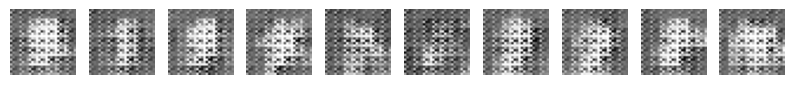

Similarity Loss: 0.379642844 Generator Loss: 0.923757792 Discriminator Loss: 1.48773813
Similarity Loss: 0.237552091 Generator Loss: 0.764652669 Discriminator Loss: 1.50599074
Similarity Loss: 0.334619522 Generator Loss: 0.910903394 Discriminator Loss: 1.46732581
Similarity Loss: 0.271089703 Generator Loss: 1.80272496 Discriminator Loss: 1.45479655
Similarity Loss: 0.292392105 Generator Loss: 0.8852 Discriminator Loss: 1.42192483
Epoch 85/20000
1/1 [==============================] - 0s 89ms/step


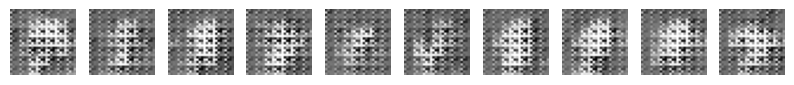

Similarity Loss: 0.303856522 Generator Loss: 0.915377736 Discriminator Loss: 2.01536536
Similarity Loss: 0.263658196 Generator Loss: 0.961350203 Discriminator Loss: 1.86522746
Similarity Loss: 0.174603343 Generator Loss: 0.930065811 Discriminator Loss: 1.81306899
Similarity Loss: 0.269948304 Generator Loss: 1.05308211 Discriminator Loss: 1.24862051
Similarity Loss: 0.338480145 Generator Loss: 1.1896373 Discriminator Loss: 1.76262498
Epoch 90/20000
1/1 [==============================] - 0s 86ms/step


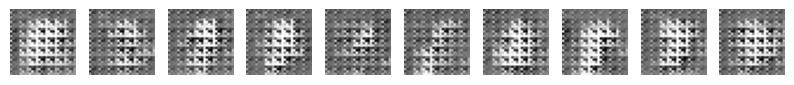

Similarity Loss: 0.233764052 Generator Loss: 1.07818389 Discriminator Loss: 1.63424444
Similarity Loss: 0.281627625 Generator Loss: 1.76431334 Discriminator Loss: 0.847732544
Similarity Loss: 0.37493211 Generator Loss: 1.49807072 Discriminator Loss: 1.03799295
Similarity Loss: 0.340925306 Generator Loss: 1.81398141 Discriminator Loss: 0.907336473
Similarity Loss: 0.368725091 Generator Loss: 1.8944788 Discriminator Loss: 0.831169665
Epoch 95/20000
1/1 [==============================] - 0s 76ms/step


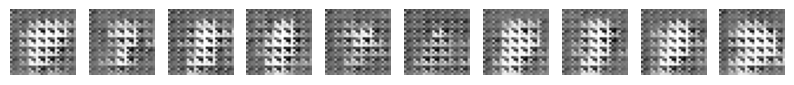

Similarity Loss: 0.476277083 Generator Loss: 1.99412584 Discriminator Loss: 0.882495284
Similarity Loss: 0.325834602 Generator Loss: 1.65977859 Discriminator Loss: 0.910243273
Similarity Loss: 0.416123122 Generator Loss: 1.70278907 Discriminator Loss: 0.935697556
Similarity Loss: 0.3159872 Generator Loss: 1.59496844 Discriminator Loss: 0.94129467
Similarity Loss: 0.457108021 Generator Loss: 1.67958498 Discriminator Loss: 0.921462238
Epoch 100/20000
1/1 [==============================] - 0s 83ms/step


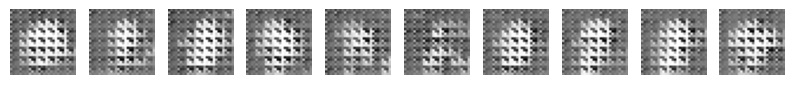

Similarity Loss: 0.321725696 Generator Loss: 1.54097688 Discriminator Loss: 0.938303947
Similarity Loss: 0.331512153 Generator Loss: 1.43423223 Discriminator Loss: 1.01999784
Similarity Loss: 0.393749565 Generator Loss: 1.52566326 Discriminator Loss: 0.990494251
Similarity Loss: 0.426856816 Generator Loss: 1.48766065 Discriminator Loss: 1.0379523
Similarity Loss: 0.502001762 Generator Loss: 1.53929 Discriminator Loss: 1.05409837
Epoch 105/20000
1/1 [==============================] - 0s 92ms/step


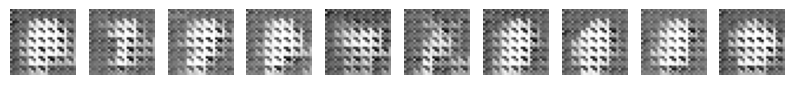

Similarity Loss: 0.519310772 Generator Loss: 2.08452559 Discriminator Loss: 0.838769138
Similarity Loss: 0.512340963 Generator Loss: 1.38338554 Discriminator Loss: 1.14485443
Similarity Loss: 0.597274959 Generator Loss: 1.55615711 Discriminator Loss: 1.56150723
Similarity Loss: 0.608343899 Generator Loss: 1.48010325 Discriminator Loss: 1.07947898
Similarity Loss: 0.529217422 Generator Loss: 1.33460307 Discriminator Loss: 1.12907767
Epoch 110/20000
1/1 [==============================] - 0s 76ms/step


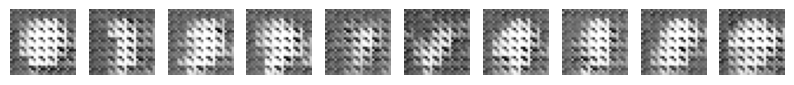

Similarity Loss: 0.527585924 Generator Loss: 1.43212295 Discriminator Loss: 1.10649705
Similarity Loss: 0.581690311 Generator Loss: 1.40485239 Discriminator Loss: 1.13520992
Similarity Loss: 0.508837521 Generator Loss: 1.34433234 Discriminator Loss: 1.13417268
Similarity Loss: 0.640723705 Generator Loss: 2.55884242 Discriminator Loss: 0.800028205
Similarity Loss: 0.593937039 Generator Loss: 1.54929376 Discriminator Loss: 1.0767566
Epoch 115/20000
1/1 [==============================] - 0s 83ms/step


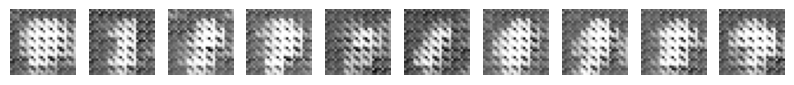

Similarity Loss: 0.654440224 Generator Loss: 1.63682652 Discriminator Loss: 1.05
Similarity Loss: 0.551974297 Generator Loss: 1.59794402 Discriminator Loss: 1.04853272
Similarity Loss: 0.610077798 Generator Loss: 1.64681768 Discriminator Loss: 1.05244315
Similarity Loss: 0.574336052 Generator Loss: 1.57516778 Discriminator Loss: 1.54565823
Similarity Loss: 0.543722868 Generator Loss: 1.5490706 Discriminator Loss: 1.0333159
Epoch 120/20000
1/1 [==============================] - 0s 76ms/step


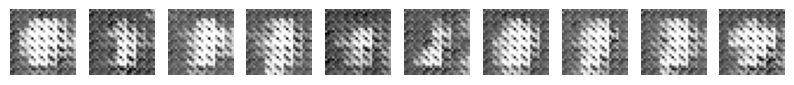

Similarity Loss: 0.530778825 Generator Loss: 1.52736938 Discriminator Loss: 1.05548429
Similarity Loss: 0.501672685 Generator Loss: 1.42930532 Discriminator Loss: 1.11282957
Similarity Loss: 0.550743401 Generator Loss: 1.33736908 Discriminator Loss: 1.22569108
Similarity Loss: 0.577896774 Generator Loss: 1.41691375 Discriminator Loss: 1.15108728
Similarity Loss: 0.595088661 Generator Loss: 1.38085294 Discriminator Loss: 1.21384501
Epoch 125/20000
1/1 [==============================] - 0s 93ms/step


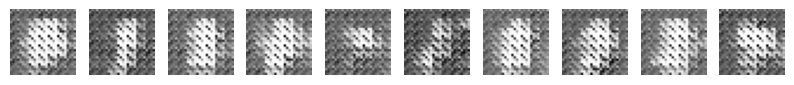

Similarity Loss: 0.554904938 Generator Loss: 1.24073935 Discriminator Loss: 1.29881954
Similarity Loss: 0.528909087 Generator Loss: 1.24555659 Discriminator Loss: 1.27966321
Similarity Loss: 0.545444965 Generator Loss: 1.22281659 Discriminator Loss: 1.78537333
Similarity Loss: 0.52961719 Generator Loss: 1.16864419 Discriminator Loss: 1.35923481
Similarity Loss: 0.55491066 Generator Loss: 1.26125383 Discriminator Loss: 1.79230094
Epoch 130/20000
1/1 [==============================] - 0s 83ms/step


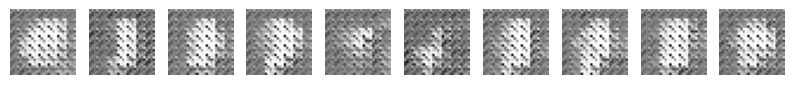

Similarity Loss: 0.489849478 Generator Loss: 1.23962712 Discriminator Loss: 1.28008628
Similarity Loss: 0.443048 Generator Loss: 1.19758654 Discriminator Loss: 1.23539352
Similarity Loss: 0.384096444 Generator Loss: 1.09338117 Discriminator Loss: 1.83183086
Similarity Loss: 0.402729183 Generator Loss: 1.19679093 Discriminator Loss: 1.8069371
Similarity Loss: 0.516296 Generator Loss: 1.29143775 Discriminator Loss: 1.74444056
Epoch 135/20000
1/1 [==============================] - 0s 83ms/step


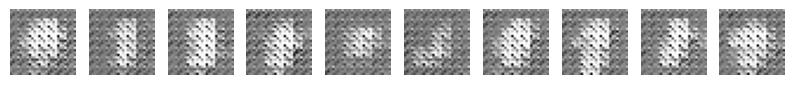

Similarity Loss: 0.383651704 Generator Loss: 1.11633396 Discriminator Loss: 1.26301396
Similarity Loss: 0.385044664 Generator Loss: 1.18668127 Discriminator Loss: 1.21677065
Similarity Loss: 0.384706497 Generator Loss: 1.20682645 Discriminator Loss: 1.22938824
Similarity Loss: 0.289800823 Generator Loss: 1.07445502 Discriminator Loss: 1.56564045
Similarity Loss: 0.306360215 Generator Loss: 1.73075354 Discriminator Loss: 0.825572908
Epoch 140/20000
1/1 [==============================] - 0s 79ms/step


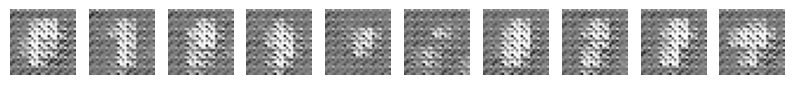

Similarity Loss: 0.303069085 Generator Loss: 1.60178041 Discriminator Loss: 0.892080128
Similarity Loss: 0.247890741 Generator Loss: 1.40794659 Discriminator Loss: 0.897869945
Similarity Loss: 0.293679625 Generator Loss: 0.923975706 Discriminator Loss: 1.32341433
Similarity Loss: 0.263653964 Generator Loss: 0.888429165 Discriminator Loss: 1.29863966
Similarity Loss: 0.17867364 Generator Loss: 0.782798409 Discriminator Loss: 1.95048738
Epoch 145/20000
1/1 [==============================] - 0s 91ms/step


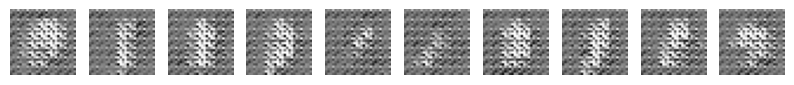

Similarity Loss: 0.174304366 Generator Loss: 1.02648973 Discriminator Loss: 1.07692337
Similarity Loss: 0.216808245 Generator Loss: 0.777255297 Discriminator Loss: 1.3416152
Similarity Loss: 0.2238525 Generator Loss: 0.832541 Discriminator Loss: 1.28063655
Similarity Loss: 0.204703599 Generator Loss: 0.845432639 Discriminator Loss: 1.24030352
Similarity Loss: 0.168489605 Generator Loss: 0.829225302 Discriminator Loss: 1.20357835
Epoch 150/20000
1/1 [==============================] - 0s 80ms/step


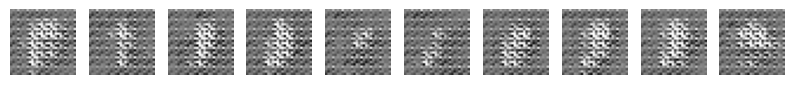

Similarity Loss: 0.19687818 Generator Loss: 0.901885152 Discriminator Loss: 1.71408677
Similarity Loss: 0.153014407 Generator Loss: 0.901327848 Discriminator Loss: 1.09924424
Similarity Loss: 0.251927882 Generator Loss: 1.0967114 Discriminator Loss: 1.00981843
Similarity Loss: 0.252022982 Generator Loss: 1.17264247 Discriminator Loss: 0.951609492
Similarity Loss: 0.232554674 Generator Loss: 1.14529407 Discriminator Loss: 0.963592112
Epoch 155/20000
1/1 [==============================] - 0s 81ms/step


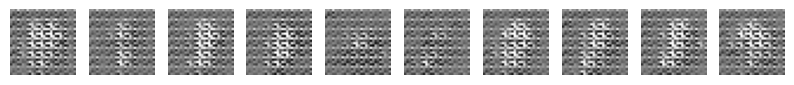

Similarity Loss: 0.177459911 Generator Loss: 1.24705768 Discriminator Loss: 0.831970215
Similarity Loss: 0.247563675 Generator Loss: 1.33586442 Discriminator Loss: 0.813851774
Similarity Loss: 0.176975802 Generator Loss: 1.3225497 Discriminator Loss: 1.4635874
Similarity Loss: 0.214698941 Generator Loss: 1.41151869 Discriminator Loss: 0.783195913
Similarity Loss: 0.144563898 Generator Loss: 1.35129523 Discriminator Loss: 0.760476
Epoch 160/20000
1/1 [==============================] - 0s 79ms/step


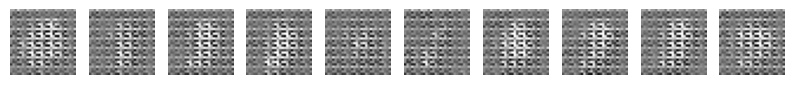

Similarity Loss: 0.25129652 Generator Loss: 1.50863135 Discriminator Loss: 1.25519192
Similarity Loss: 0.291826159 Generator Loss: 1.55077302 Discriminator Loss: 0.756185472
Similarity Loss: 0.301365852 Generator Loss: 1.59364474 Discriminator Loss: 0.696335673
Similarity Loss: 0.33370778 Generator Loss: 1.67091584 Discriminator Loss: 0.686387181
Similarity Loss: 0.383117437 Generator Loss: 1.67354536 Discriminator Loss: 0.723596334
Epoch 165/20000
1/1 [==============================] - 0s 105ms/step


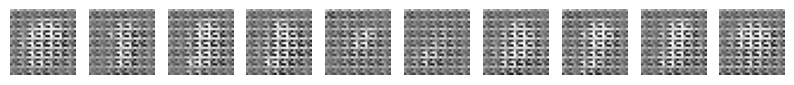

Similarity Loss: 0.424873084 Generator Loss: 1.838902 Discriminator Loss: 0.627706885
Similarity Loss: 0.452907324 Generator Loss: 1.92117214 Discriminator Loss: 0.619980097
Similarity Loss: 0.384139836 Generator Loss: 1.88177323 Discriminator Loss: 0.62790513
Similarity Loss: 0.440411866 Generator Loss: 1.91473889 Discriminator Loss: 0.590299726
Similarity Loss: 0.408229828 Generator Loss: 2.07298279 Discriminator Loss: 0.544390857
Epoch 170/20000
1/1 [==============================] - 0s 79ms/step


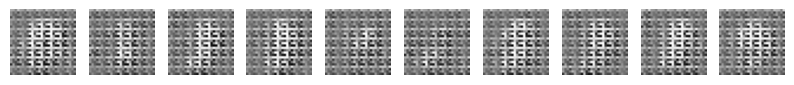

Similarity Loss: 0.366891146 Generator Loss: 2.11794 Discriminator Loss: 0.521072865
Similarity Loss: 0.319671452 Generator Loss: 2.09038067 Discriminator Loss: 0.514292479
Similarity Loss: 0.372041672 Generator Loss: 2.24577618 Discriminator Loss: 0.479183018
Similarity Loss: 0.387705445 Generator Loss: 2.22989464 Discriminator Loss: 0.476326138
Similarity Loss: 0.376170129 Generator Loss: 2.18586969 Discriminator Loss: 1.02554762
Epoch 175/20000
1/1 [==============================] - 0s 87ms/step


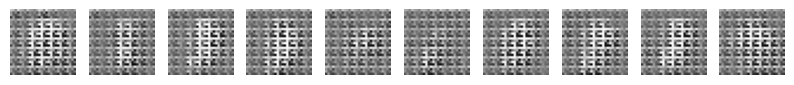

Similarity Loss: 0.38006264 Generator Loss: 2.12998581 Discriminator Loss: 0.481363177
Similarity Loss: 0.401987165 Generator Loss: 2.13256073 Discriminator Loss: 0.499823332
Similarity Loss: 0.408650398 Generator Loss: 2.0318563 Discriminator Loss: 0.502606034
Similarity Loss: 0.510565579 Generator Loss: 2.14617801 Discriminator Loss: 0.501378834
Similarity Loss: 0.542855263 Generator Loss: 2.04648399 Discriminator Loss: 0.515690625
Epoch 180/20000
1/1 [==============================] - 0s 87ms/step


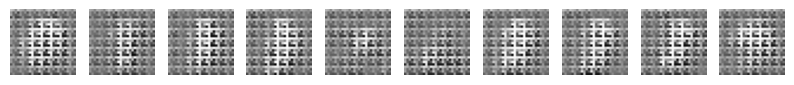

Similarity Loss: 0.567661941 Generator Loss: 1.95238543 Discriminator Loss: 0.567814231
Similarity Loss: 0.549951196 Generator Loss: 1.89350688 Discriminator Loss: 0.606783748
Similarity Loss: 0.544368386 Generator Loss: 2.1055336 Discriminator Loss: 0.500212073
Similarity Loss: 0.593490601 Generator Loss: 1.83632493 Discriminator Loss: 0.607835889
Similarity Loss: 0.599902868 Generator Loss: 1.78495204 Discriminator Loss: 0.680931687
Epoch 185/20000
1/1 [==============================] - 0s 80ms/step


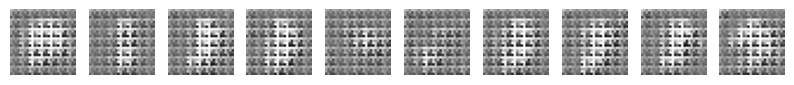

Similarity Loss: 0.57942003 Generator Loss: 1.80538464 Discriminator Loss: 0.624173701
Similarity Loss: 0.602819383 Generator Loss: 1.75008869 Discriminator Loss: 0.679256558
Similarity Loss: 0.575585663 Generator Loss: 1.68976426 Discriminator Loss: 0.721721292
Similarity Loss: 0.569142044 Generator Loss: 1.813236 Discriminator Loss: 0.631477118
Similarity Loss: 0.592803955 Generator Loss: 1.9084866 Discriminator Loss: 0.6338076
Epoch 190/20000
1/1 [==============================] - 0s 81ms/step


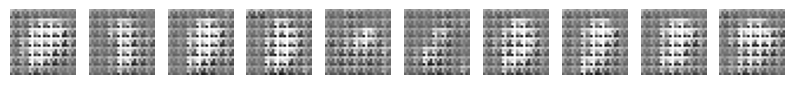

Similarity Loss: 0.567464948 Generator Loss: 1.86550236 Discriminator Loss: 1.13981616
Similarity Loss: 0.60599786 Generator Loss: 1.93814993 Discriminator Loss: 0.640155435
Similarity Loss: 0.567488253 Generator Loss: 2.00441241 Discriminator Loss: 0.583477199
Similarity Loss: 0.583747268 Generator Loss: 2.11693931 Discriminator Loss: 1.18543935
Similarity Loss: 0.55074209 Generator Loss: 1.94150615 Discriminator Loss: 0.623179555
Epoch 195/20000
1/1 [==============================] - 0s 81ms/step


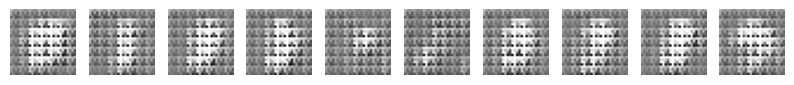

Similarity Loss: 0.583933532 Generator Loss: 2.15473223 Discriminator Loss: 0.53466481
Similarity Loss: 0.531848609 Generator Loss: 1.72958326 Discriminator Loss: 1.15838265
Similarity Loss: 0.582637489 Generator Loss: 2.27824974 Discriminator Loss: 0.519342899
Similarity Loss: 0.592022419 Generator Loss: 1.83354521 Discriminator Loss: 1.20498466
Similarity Loss: 0.549434245 Generator Loss: 2.37934613 Discriminator Loss: 0.475424469
Epoch 200/20000
1/1 [==============================] - 0s 81ms/step


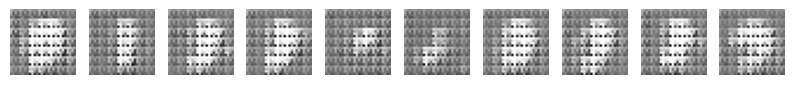

Similarity Loss: 0.493869215 Generator Loss: 2.43515205 Discriminator Loss: 0.454497486
Similarity Loss: 0.481652021 Generator Loss: 2.30329823 Discriminator Loss: 0.467865348
Similarity Loss: 0.483740538 Generator Loss: 1.39147401 Discriminator Loss: 0.917450488
Similarity Loss: 0.439879745 Generator Loss: 1.39613354 Discriminator Loss: 0.914302468
Similarity Loss: 0.438096344 Generator Loss: 2.31586242 Discriminator Loss: 0.42361775
Epoch 205/20000
1/1 [==============================] - 0s 87ms/step


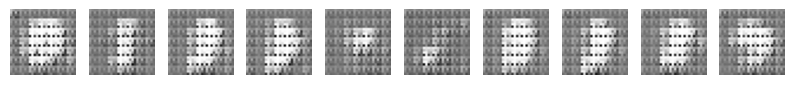

Similarity Loss: 0.428148419 Generator Loss: 1.3463279 Discriminator Loss: 0.892359674
Similarity Loss: 0.402237952 Generator Loss: 2.32960439 Discriminator Loss: 0.442597598
Similarity Loss: 0.385085076 Generator Loss: 1.34405398 Discriminator Loss: 0.891278327
Similarity Loss: 0.371608585 Generator Loss: 2.29136157 Discriminator Loss: 0.469410866
Similarity Loss: 0.360836327 Generator Loss: 2.21371317 Discriminator Loss: 0.448595
Epoch 210/20000
1/1 [==============================] - 0s 164ms/step


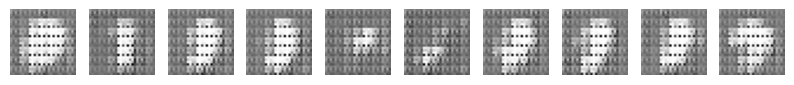

Similarity Loss: 0.315933734 Generator Loss: 2.22552156 Discriminator Loss: 0.461640298
Similarity Loss: 0.332508087 Generator Loss: 2.19524503 Discriminator Loss: 0.434036076
Similarity Loss: 0.311704546 Generator Loss: 1.32904518 Discriminator Loss: 0.804059267
Similarity Loss: 0.322023 Generator Loss: 2.04490519 Discriminator Loss: 0.992021084
Similarity Loss: 0.287617981 Generator Loss: 2.00123334 Discriminator Loss: 0.513197899
Epoch 215/20000
1/1 [==============================] - 0s 171ms/step


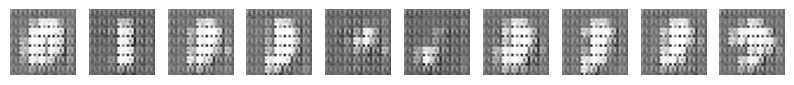

Similarity Loss: 0.299265832 Generator Loss: 2.04991794 Discriminator Loss: 0.941333294
Similarity Loss: 0.278645903 Generator Loss: 1.20088756 Discriminator Loss: 0.896011
Similarity Loss: 0.262440622 Generator Loss: 1.72023296 Discriminator Loss: 0.586827219
Similarity Loss: 0.250609487 Generator Loss: 1.2846837 Discriminator Loss: 1.30872393
Similarity Loss: 0.255139202 Generator Loss: 1.65042531 Discriminator Loss: 0.612167776
Epoch 220/20000
1/1 [==============================] - 0s 147ms/step


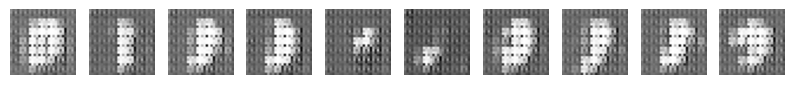

Similarity Loss: 0.232794359 Generator Loss: 1.28812039 Discriminator Loss: 0.848841667
Similarity Loss: 0.212237269 Generator Loss: 1.38840401 Discriminator Loss: 0.713918209
Similarity Loss: 0.229143128 Generator Loss: 1.33830035 Discriminator Loss: 0.821980417
Similarity Loss: 0.208365783 Generator Loss: 1.29776025 Discriminator Loss: 0.763699174
Similarity Loss: 0.232425019 Generator Loss: 1.25080431 Discriminator Loss: 0.796182752
Epoch 225/20000
1/1 [==============================] - 0s 150ms/step


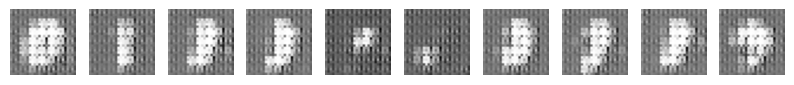

Similarity Loss: 0.221234724 Generator Loss: 1.24796546 Discriminator Loss: 0.848630607
Similarity Loss: 0.220142603 Generator Loss: 1.1506238 Discriminator Loss: 0.899588585
Similarity Loss: 0.223846778 Generator Loss: 1.24860084 Discriminator Loss: 0.862858772
Similarity Loss: 0.204540595 Generator Loss: 1.53913009 Discriminator Loss: 1.30014348
Similarity Loss: 0.223865256 Generator Loss: 1.05378413 Discriminator Loss: 1.05647016
Epoch 230/20000
1/1 [==============================] - 0s 77ms/step


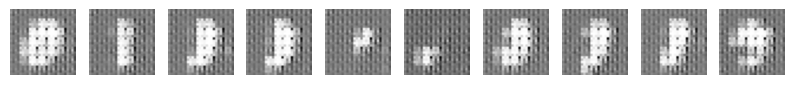

Similarity Loss: 0.218991831 Generator Loss: 1.0504936 Discriminator Loss: 1.6521585
Similarity Loss: 0.212823272 Generator Loss: 1.09007454 Discriminator Loss: 1.08351159
Similarity Loss: 0.254944652 Generator Loss: 1.86938751 Discriminator Loss: 0.734951735
Similarity Loss: 0.24833338 Generator Loss: 1.09771 Discriminator Loss: 1.8152101
Similarity Loss: 0.235982522 Generator Loss: 1.11458397 Discriminator Loss: 1.06958711
Epoch 235/20000
1/1 [==============================] - 0s 78ms/step


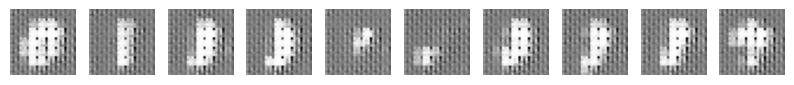

Similarity Loss: 0.231507331 Generator Loss: 1.19825268 Discriminator Loss: 1.08841801
Similarity Loss: 0.241791606 Generator Loss: 1.20466816 Discriminator Loss: 1.86687624
Similarity Loss: 0.241843387 Generator Loss: 1.29873598 Discriminator Loss: 1.07313216
Similarity Loss: 0.246397421 Generator Loss: 1.36824727 Discriminator Loss: 1.06396663
Similarity Loss: 0.266088814 Generator Loss: 1.46552479 Discriminator Loss: 0.962289572
Epoch 240/20000
1/1 [==============================] - ETA: 0s

In [ ]:
# Train the GAN
EPOCHS = 20000
BATCH_SIZE = 64
train(generator, discriminator, gan, EPOCHS, BATCH_SIZE)